Import Dataset

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [59]:
# import NBA_train dataset
NBA_train = pd.read_csv('../data/processed/NBA_train_cleaned.csv')
NBA_train.head(10)

,Unnamed: 0,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,0,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,1,75,21.8,10.5,4.2,7.9,55.1,0.0,0.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,2,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,3,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,4,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1
5,5,88,20.0,8.8,3.7,8.7,43.6,0.0,0.0,6.9,...,2.8,75.1,1.8,2.9,4.7,1.8,0.4,0.3,1.1,1
6,6,70,20.6,7.0,3.2,5.4,58.9,0.1,0.0,0.0,...,1.4,56.7,2.9,4.6,7.6,0.6,0.4,0.7,1.2,1
7,7,57,17.6,5.4,1.7,4.7,37.2,0.9,2.8,33.2,...,1.8,78.3,0.8,1.7,2.6,0.4,0.6,0.6,0.3,1
8,8,46,26.5,9.3,3.1,7.2,44.0,0.6,1.7,27.5,...,2.3,82.1,1.3,2.8,4.1,1.8,0.7,0.6,1.7,1
9,9,64,33.4,16.9,6.4,11.3,59.0,0.3,1.1,0.0,...,4.9,74.9,3.4,8.0,11.9,0.8,0.4,2.5,2.4,1


In [60]:
NBA_train = NBA_train.drop(['Unnamed: 0'], axis=1)  
NBA_train

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,75,21.8,10.5,4.2,7.9,55.1,0.0,0.0,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,32,9.2,1.8,0.7,1.8,40.3,0.0,0.0,23.1,0.4,0.6,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4,1
7996,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,3.1,0.2,0.4,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3,1
7997,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,23.6,2.8,3.9,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8,1
7998,39,7.7,2.5,1.0,2.3,40.1,0.0,0.0,13.3,0.6,0.7,74.3,0.4,0.6,0.9,0.2,0.3,0.3,0.5,1


Dividing X and Y Columns 

In [61]:
X = NBA_train.drop(['TARGET_5Yrs'], axis=1)
y = NBA_train['TARGET_5Yrs']

Splitting the Dataset

In [62]:
# Split the NBA_train dataset into train and validation dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

# Check the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6400, 19)
Shape of X_test: (1600, 19)
Shape of y_train: (6400,)
Shape of y_test: (1600,)


Access Baseline Model

In [63]:
# Find the mode of the target variable from the training set and print its value
y_mode = y_train.mode()
y_mode

0    1
Name: TARGET_5Yrs, dtype: int64

In [64]:
# Create a numpy array with the same dimensions as for the training set called y_base filled with this value
y_shape = (len(X_train), 1)
y_base = np.full(y_shape, y_mode)

In [65]:
# Import the accuracy score from sklearn
from sklearn.metrics import accuracy_score

In [66]:
# Display the accuracy score of this baseline model on the training set
accuracy_score(y_train, y_base)

0.8321875

Modelling

In [67]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "XGBoost": XGBClassifier()}

# Define function that will evaluate the model performance using various metrics
def evaluate_pred(y_test, y_pred, y_pred_prob):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    metric_dict = {"Accuracy": round(accuracy, 4), "Precision": round(precision, 4), "Recall": round(recall, 4), "F1": round(f1,4), "ROC_AUC": round(roc_auc,4)}

    return metric_dict

# Define function that will fit and evaluate the models
def fit_and_eval(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    # Dictionary of model scores
    model_scores = {}
    model_metrics = {}
    results = {}
    
    # Loop through models
    for name, model in models.items():
        clf = model
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_pred_prob = clf.predict_proba(X_test)[:,1]
        results[name] = { "Score":model.score(X_test, y_test), "Model_Metrics":evaluate_pred(y_test, y_pred, y_pred_prob) }

        # Print the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix ({name})')
        plt.show()
    
    return results

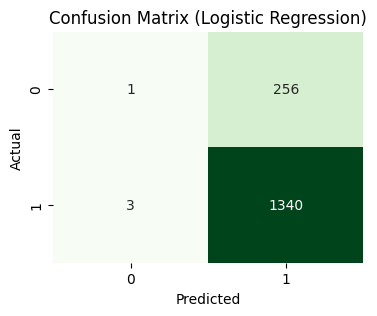

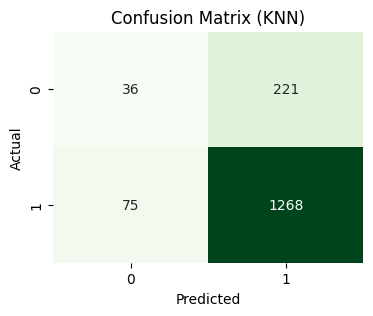

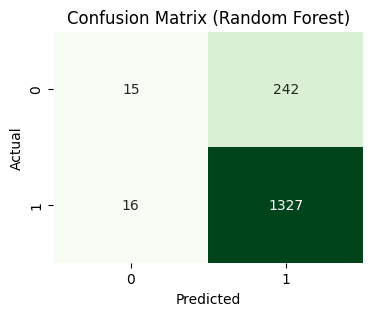

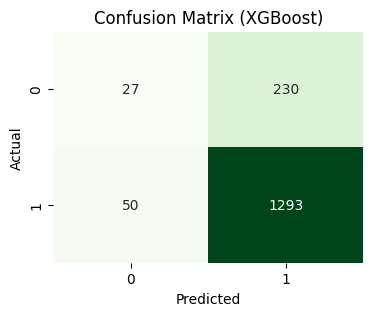

{'Logistic Regression': {'Score': 0.838125,
  'Model_Metrics': {'Accuracy': 0.8381,
   'Precision': 0.8396,
   'Recall': 0.9978,
   'F1': 0.9119,
   'ROC_AUC': 0.7028}},
 'KNN': {'Score': 0.815,
  'Model_Metrics': {'Accuracy': 0.815,
   'Precision': 0.8516,
   'Recall': 0.9442,
   'F1': 0.8955,
   'ROC_AUC': 0.6019}},
 'Random Forest': {'Score': 0.83875,
  'Model_Metrics': {'Accuracy': 0.8388,
   'Precision': 0.8458,
   'Recall': 0.9881,
   'F1': 0.9114,
   'ROC_AUC': 0.6572}},
 'XGBoost': {'Score': 0.825,
  'Model_Metrics': {'Accuracy': 0.825,
   'Precision': 0.849,
   'Recall': 0.9628,
   'F1': 0.9023,
   'ROC_AUC': 0.6484}}}

In [68]:
model_fit_results = fit_and_eval(models, X_train, X_test, y_train, y_test)
model_fit_results

In [69]:
# Convert the dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(model_fit_results, orient='index')

# Reset the index (optional)
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Flatten the nested dictionary inside 'Model_Metrics'
results_df = pd.concat([results_df.drop(['Model_Metrics'], axis=1), results_df['Model_Metrics'].apply(pd.Series)], axis=1)

print(results_df)

                 Model     Score  Accuracy  Precision  Recall      F1  ROC_AUC
0  Logistic Regression  0.838125    0.8381     0.8396  0.9978  0.9119   0.7028
1                  KNN  0.815000    0.8150     0.8516  0.9442  0.8955   0.6019
2        Random Forest  0.838750    0.8388     0.8458  0.9881  0.9114   0.6572
3              XGBoost  0.825000    0.8250     0.8490  0.9628  0.9023   0.6484
